In [132]:
import numpy as np
import math
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

class SAnnealing(object):

    def __init__(self, domain, step = 1, final_temperature=0.1, temperature = 100, alpha=0.95, equilibrium=10, time = 0):
        self.domain = domain
        self.step = step
        self.temperature = temperature
        self.final_temperature = final_temperature
        self.alpha = alpha
        self.equilibrium = equilibrium
        self.time = time

    def ieee_mantissa_to_decimal(self, mantissa_bits, exponent_bias):
        """
        Convierte la mantissa en formato IEEE-754 a su valor decimal.
        """
        sign = -1 if mantissa_bits[0] else 1
        exponent = int(''.join(str(bit) for bit in mantissa_bits[1:exponent_bias+1]), 2) - (2 ** (exponent_bias-1) - 1)
        fraction = 1 + sum(mantissa_bits[exponent_bias+1+i] * 2**(-i-1) for i in range(len(mantissa_bits)-(exponent_bias+1)))
        return sign * fraction * 2**exponent


    def cost_function(self, f, x):
        newX = ieee_mantissa_to_decimal(x,8)
        return f(newX)


    def create_first_solution(self):
        #return np.array([float(np.random.randint(self.domain[i][0], self.domain[i][1])) for i in range(len(self.domain))])
         return np.array([0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])


    def create_neighbor_solution(self, actual_solution):
        neighbor = actual_solution.copy()
        idx = np.random.randint(len(actual_solution))
        if neighbor[idx] == 0:
            neighbor[idx] = 1
        else:
            neighbor[idx] = 0
        return neighbor


    def aceptance_probability(self, deltaE, temperature):
        try:
            r = math.exp(-deltaE/temperature)
        except OverflowError:
            r = float("inf") 
        return r


    def update_temperature(self, temperature):
        return self.alpha * temperature


    def fit(self, objetive):
        self.cost_ = []
        actual_solution = self.create_first_solution()
        best_solution = actual_solution.copy()
        epoch = 0
        number_tested_solution = 0
        aceptanced = 100
        while (self.temperature > self.final_temperature):
            
            number_worst_solution_acepted = 0
            i = 0
            while (i < self.equilibrium):
                random_solution = self.create_neighbor_solution(actual_solution)
                number_tested_solution += 1
                delta_E = self.cost_function(objetive, random_solution) - self.cost_function(objetive, actual_solution)
                #print(f'Valor deltaE = {delta_E}')
                if delta_E > 0:
                    actual_solution = random_solution.copy()
                    #print("Solución vecina aceptada por mejora")
                else:
                    #print("Solución veicina no aceptada... genearar probabilidad")
                    deg_deltaE = self.aceptance_probability(-delta_E, self.temperature)
                    if(np.random.uniform(0, 1) < deg_deltaE):
                        actual_solution = random_solution.copy()
                        number_worst_solution_acepted += 1
                        #print("La solución vecina fue aceptada por probabilidad")
                x, y = self.cost_function(objetive, actual_solution)
                self.cost_.append((x,y))
                epoch_strlen = len(str(epoch))
                sys.stderr.write('\r%0*d Epoch | Equilibrium %d | Temperature %.2f '
                                '| Actual solution %.2f | Cost function: %.2f | Aceptance : %.2f' 
                        %
                        (epoch_strlen, epoch+1, i+1, self.temperature, 
                        x, y, aceptanced ))
                time.sleep(self.time)
                sys.stderr.flush()
                i += 1
                epoch += 1
                #actualizar best_solution
            #print("Punto de equilibrio alcanzado..")
            aceptanced = number_worst_solution_acepted * 100 /number_tested_solution
            self.temperature = self.update_temperature(self.temperature)
            #print(f"Temperatura actualizada: {temperature}")

In [133]:
def cubic_function(x):
    return x**3 - 60*x**2 + 900*x + 100

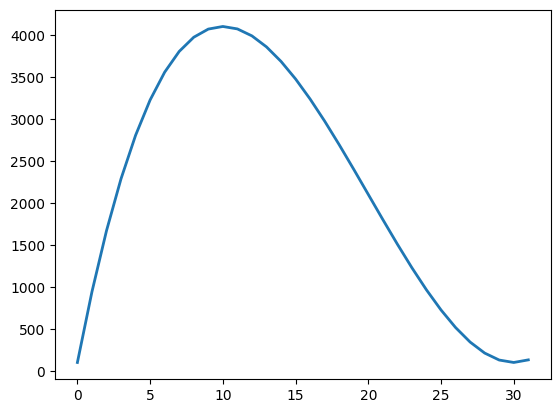

In [134]:
x = np.arange(32)
y = np.array(list(map(cubic_function, x)))

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

# ax.set(xlim=(0, 32), xticks=np.arange(0, 32),
#        ylim=(0, 5000), yticks=np.arange(0, 5000))

plt.show()

In [135]:
#def cubic_function(x):
#    x = int(''.join(str(c) for c in x), 2)
#    return (x, x**3 - 60*x**2 + 900*x + 100)


In [136]:
sa = SAnnealing(domain=((0, 32),), step=1, final_temperature=0.1, temperature=500, alpha=0.95, equilibrium=10, time=0)
sa.fit(cubic_function)


IndexError: invalid index to scalar variable.

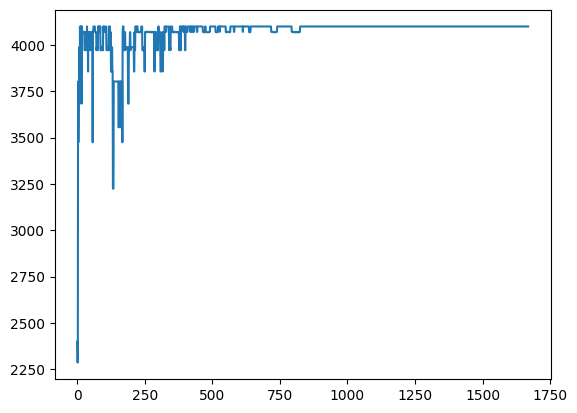

In [ ]:
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()

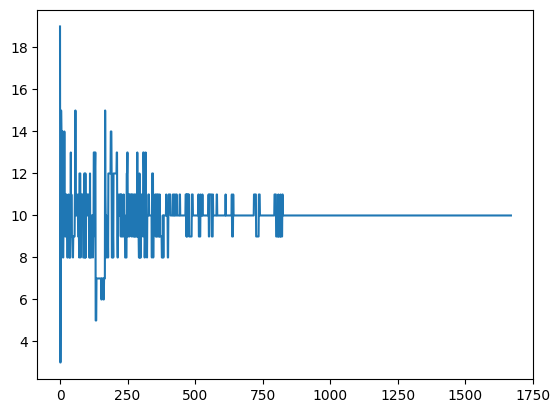

In [ ]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()

In [ ]:
sa = SAnnealing(domain=((0, 32),), step=1, final_temperature=0.1, temperature=200, alpha=0.95, equilibrium=10, time=0)
sa.fit(cubic_function)

332 Epoch | Equilibrium 2 | Temperature 36.81 | Actual solution 11.00 | Cost function: 4071.00 | Aceptance : 0.3027

2287
2287
1668
3803
2287
3475
3857
3225
3475
4069
3972
964
3988
3684
3857
3684
3684
2804
3684
3857
129
3225
3988
212
3972
4069
3857
4071
4069
3857
3475
3475
4069
941
4071
4100
3972
100
4100
3972
516
516
1668
516
1668
516
3684
4100
3972
100
4100
4071
3475
4100
3972
964
100
964
4100
3972
3684
516
1668
4071
3475
4069
3857
129
4069
4071
2287
343
3475
3475
2287
343
3475
3475
4069
3972
4071
4100
3972
4071
343
3475
343
2287
343
343
4069
725
4071
343
3475
343
4100
516
1668
4071
3684
3972
3988
3972
964
4100
4071
343
343
2287
2287
343
4100
4071
4069
3857
941
4071
343
4100
3972
516
3684
516
3972
4071
3475
3475
4100
3684
3972
3972
516
3684
4071
4100
3972
1668
3972
3684
3972
4100
1668
3972
1668
3684
516
4071
4069
941
3857
4071
343
343
3475
4100
3684
1668
3684
3972
3972
3988
2804
3972
3988
3684
3972
4069
941
3857
3857
129
3988
212
2804
3684
3857
3857
3857
3972
4100
1668
3684
516
3684
1668
4071
1668
3972
100
100
100
100
964
3988
212
212
3857
2804
3684
212
212
3857
212
2804
3857
212
3972
4069
725
725


713 Epoch | Equilibrium 3 | Temperature 5.24 | Actual solution 10.00 | Cost function: 4100.00 | Aceptance : 0.0000

4100
3972
516
1668
1668
516
4071
3972
3684
3684
3972
3684
4071
1668
1668
3684
3972
516
1668
516
516
4071
2287
4100
4071
3972
1668
3684
1668
4071
516
3684
4071
3684
3972
4071
4100
516
1668
3972
516
4071
3684
516
1668
4071
4069
3857
725
4071
2287
2287
4100
516
4071
1668
4071
3972
3972
1668
1668
1668
3972
516
516
3972
3972
516
516
4071
4100
4071
2287
343
3475
3475
4100
1668
516
516
3684
4071
4071
3684
3684
3972
4071
3972
1668
4071
516
3684
3972
3972
4071
3684
1668
516
3972
1668
516
516
1668
3972
3972
3972
4071
516
516
3684
1668
516
3684
4071
3972
3972
3972
3972
3972
4071
3684
1668
4071
4071
3684
3972
4071
4100
3972
3972
3972
4071
343
2287
343
4100
516
3684
4071
3684
3972
3972
516
3972
3684
4071
4071
516
3684
3684
4071
1668
3972
1668
3972
4071
3684
1668
3972
1668
4071
4069
3857
4071
3475
3475
2287
2287
3475
343
4069
941
3857
941
941
725
4071
3475
3475
3475
343
4100
1668
3972
4071
4071
4071
516
3684
1668
516
4071
3972
3684
3972
516
4071
3972
1668
1668
3972
1668
4071
4071
3972
1668
4071
1668

1010 Epoch | Equilibrium 10 | Temperature 1.18 | Actual solution 10.00 | Cost function: 4100.00 | Aceptance : 0.00

4071
3972
516
4071
4071
1668
4071
3684
516
4071
3684
1668
4071
516
3972
4071
516
1668
3684
1668
4071
3972
3684
1668
516
1668
4071
3684
3972
3972
4071
3684
3972
516
516
3684
3684
1668
4071
3972
1668
516
3972
516
3972
3684
4071
4071
516
4071
3684
1668
3972
3972
1668
3684
4071
4071
516
3684
4071
3972
516
3684
4071
3684
1668
516
3684
516
1668
3972
516
4071
4071
516
3972
516
3972
4071
4071
1668
4071
4071
3684
1668
3684
1668
3972
516
3684
1668
4071
3684
1668
516
3684
516
3972
3972
516
1668
3684
4071
3684
1668
516
3684
516
1668
1668
516
3972
3972
1668
1668
516
516
3684
1668
3972
1668
1668
1668
4071
3684
4071
4071
3684
3972
1668
4071
516
1668
3972
3684
3684
3972
516
516
3684
1668
1668
516
1668
3684
1668
3684
3684
3684
3972
516
1668
3684
516
1668
4071
3972
1668
516
4071
4071
516
4071
3972
516
3972
3972
1668
1668
3972
1668
516
3972
3684
516
1668
516
4071
3684
516
3972
4071
516
3684
3972
516
516
4071
1668
3684
1668
3972
1668
3684
4071
3684
3684
3972
516
3684
516
3684
3684
3972
1668
1668
3684
516


1363 Epoch | Equilibrium 3 | Temperature 0.19 | Actual solution 10.00 | Cost function: 4100.00 | Aceptance : 0.000

1668
1668
1668
1668
4071
3684
4071
4071
4071
3972
1668
4071
4071
3972
516
3684
4071
3972
516
1668
4071
1668
3972
516
3972
1668
516
3684
3684
3684
4071
516
1668
3972
1668
516
516
516
4071
4071
4071
3972
3684
3972
4071
3684
1668
3972
516
4071
3972
1668
3684
4071
3684
3684
3972
3684
1668
1668
3972
1668
516
3684
3684
1668
516
3972
516
1668
4071
3972
3684
3684
1668
4071
516
516
3684
1668
4071
1668
4071
1668
4071
3972
4071
1668
3972
1668
1668
1668
1668
1668
516
516
3972
3972
1668
4071
3684
3684
516
3972
3972
3684
516
516
516
1668
3684
3972
4071
3684
4071
516
3684
1668
1668
3972
4071
516
4071
3972
3684
4071
3684
4071
516
516
4071
1668
516
4071
4071
4071
516
3972
1668
3684
1668
1668
516
3972
3684
1668
3972
3972
3972
4071
3684
3684
4071
3972
1668
4071
1668
4071
4071
3684
3684
3684
3972
4071
4071
3972
1668
1668
1668
3972
516
1668
3972
1668
516
3684
3684
3972
3684
3972
3684
4071
1668
4071
516
1668
1668
3972
3684
3972
3684
4071
3972
516
516
3972
3972
3972
516
4071
4071
516
516
3684
3972
516
516
40

1490 Epoch | Equilibrium 10 | Temperature 0.10 | Actual solution 10.00 | Cost function: 4100.00 | Aceptance : 0.00

3684
516
1668
516
516
4071
4071
4071
1668
1668
3972
3972
516
3684
3684
516
1668
1668
3972
3972
516
1668
516
516
3684
3972
3972
3684
3972
3684
3684
3972
516
1668
3972
1668
516
516
1668
3684
516
1668
4071
4071
3972
4071
516
3972
3684
1668
4071
516
4071
3684
3684
4071
3684
1668
1668
1668
3684
1668
3684
1668
4071
4071
3684
1668
1668
516
1668
1668
3684
516
4071
3684
3972
3972
516
516
516
1668
516
516
3972
3972
1668
1668
3972
3972
3684
3684
3972
3972
3972
3684
3972
4071
1668
3972
516
4071
516
516
516
4071
516
4071
4071
3684
1668
3972
516
3684
4071
3684
516
3684
1668
3684
516
4071
3684
516
516
516
516


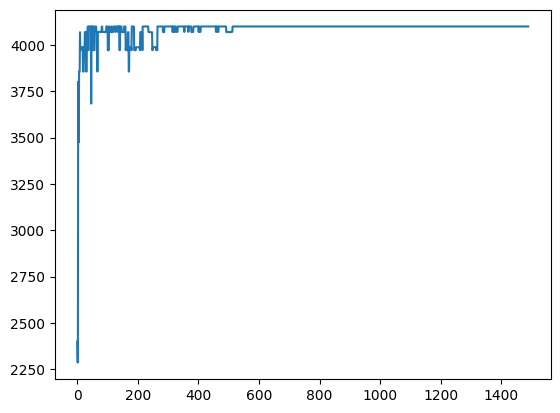

In [ ]:
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()

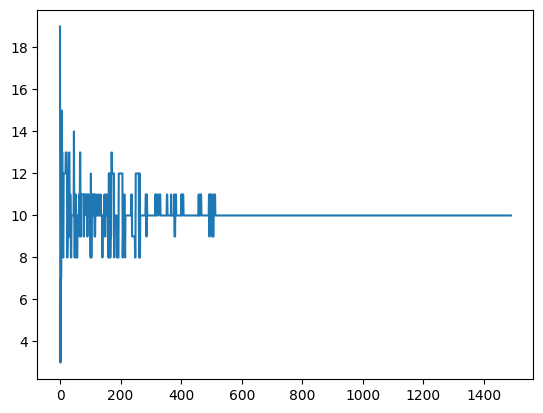

In [ ]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()